# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [12]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [13]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 32
y_size = 128
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 80001
batch = 16

In [14]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32768)             3309568   
_________________________________________________________________
batch_normalization_2 (Batch (None, 32768)             131072    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 32, 128)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 64, 64)        204864    
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 64, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 16, 64, 64)       

In [15]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 64, 64)        1664      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 64, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 32, 128)        204928    
_________________________________________________________________
activation_5 (Activation)    (None, 8, 32, 128)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 32, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)            

In [16]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                    
dis_output = discriminator(generator(ginput))         
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 32, 128, 1)        3647361   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 239361    
Total params: 3,886,722
Trainable params: 3,581,697
Non-trainable params: 305,025
_________________________________________________________________


In [17]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_m_data.npy')

print(X_train.shape)    #

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2205, 128, 32)


28, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128,

(2205, 128, 32)

In [9]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2205, 128, 32)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.0008481145 -80.0

  scale1 = StandardScaler()
  X_train = scale1.fit_transform(X_train)
  print(np.max(X_train), np.min(X_train))   # 46.94678 -1.1199807

  scale2 = MaxAbsScaler()
  X_train = scale2.fit_transform(X_train)
  print(X_train.shape)   # (2205, 4096)
  print(np.max(X_train), np.min(X_train))   # 1.0 -0.5013339


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2205, 32, 128, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan16.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            # idx2 = np.random.randint(0, gen_imgs.shape[0])
            idx2 = 5    # 출력 값 고정
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 32, 128, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (862,128))
            # gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            # print(gen_mels.shape) # (862, 128)
            # gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan16\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
    

gan_train(epochs, batch, 100)


end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

09  d_loss:0.0345  g_loss:2.6643
epoch:510  d_loss:0.0683  g_loss:3.5249
epoch:511  d_loss:0.0265  g_loss:4.5689
epoch:512  d_loss:0.0099  g_loss:6.2069
epoch:513  d_loss:0.0022  g_loss:7.4397
epoch:514  d_loss:0.1877  g_loss:4.4006
epoch:515  d_loss:0.1008  g_loss:3.0379
epoch:516  d_loss:0.2194  g_loss:3.8975
epoch:517  d_loss:0.0186  g_loss:7.0066
epoch:518  d_loss:0.2088  g_loss:5.1691
epoch:519  d_loss:0.0801  g_loss:4.1626
epoch:520  d_loss:0.1171  g_loss:3.6999
epoch:521  d_loss:0.0718  g_loss:4.6455
epoch:522  d_loss:0.0259  g_loss:4.4352
epoch:523  d_loss:0.0402  g_loss:4.4617
epoch:524  d_loss:0.0309  g_loss:4.0298
epoch:525  d_loss:0.0183  g_loss:4.6882
epoch:526  d_loss:0.0176  g_loss:5.7111
epoch:527  d_loss:0.0331  g_loss:4.8062
epoch:528  d_loss:0.0200  g_loss:6.2117
epoch:529  d_loss:0.0246  g_loss:5.9667
epoch:530  d_loss:0.0232  g_loss:5.1478
epoch:531  d_loss:0.0215  g_loss:5.2887
epoch:532  d_loss:0.0233  g_loss:3.8867
epoch:533  d_loss:0.0243  g_loss:4.2168
epoch:5

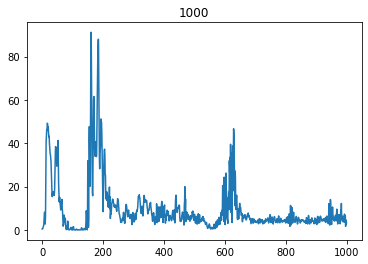

In [10]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan16.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

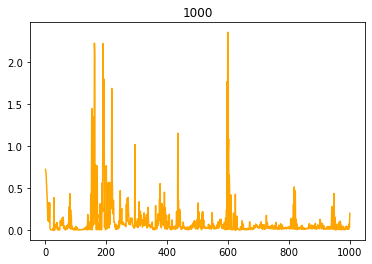

In [11]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()